Dataset Head:
   Hours_Studied  Review_Session  Results
0       3.745401               0        0
1       9.507143               1        1
2       7.319939               0        1
3       5.986585               0        1
4       1.560186               1        1


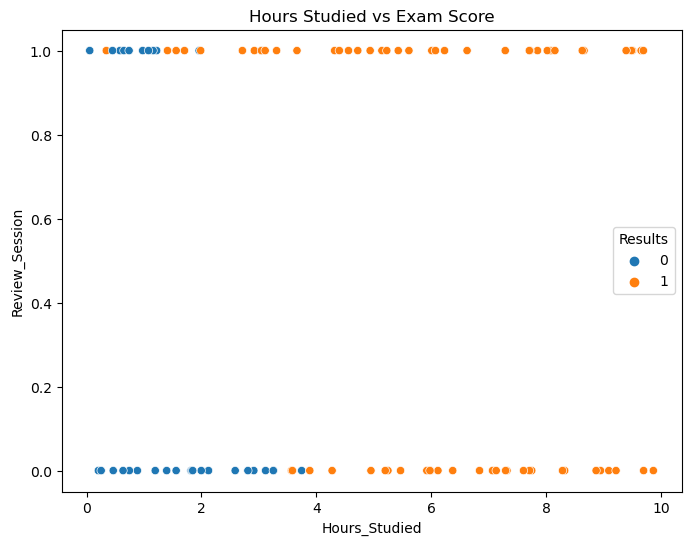

Model coefficients: [[1.36499215 1.87733756]]
Intercept: [-4.61182462]
Accuracy: 0.93
AUC: 0.98


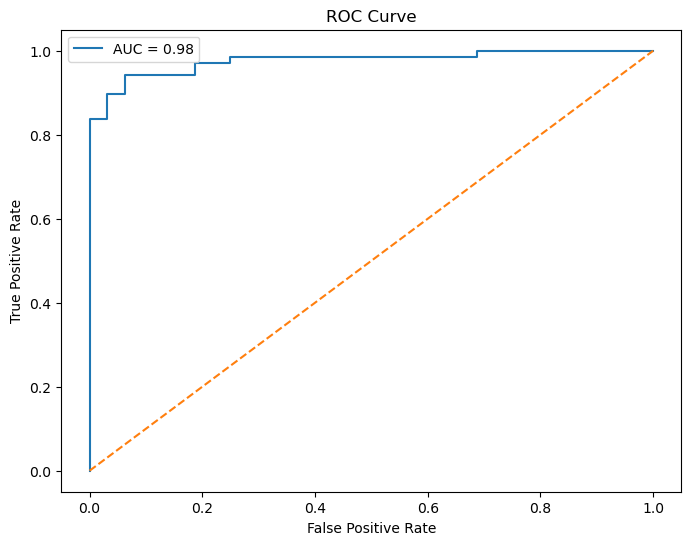

In [15]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Load the dataset
data = pd.read_csv(r'C:\Users\gyala\Downloads\student_data.csv')

# Display the first few rows of the dataset
print("Dataset Head:")
print(data.head())

# Visualization of data: Assuming the dataset has 'hours_studied', 'exam_score', and 'passed' columns
plt.figure(figsize=(8,6))
sns.scatterplot(x='Hours_Studied', y='Review_Session', hue='Results', data=data)
plt.title('Hours Studied vs Exam Score')
plt.show()

# Prepare the features (X) and target (y)
X = data[['Hours_Studied', 'Review_Session']]  # Features
y = data['Results']  # Target

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Output model coefficients
print("Model coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Predict using the same dataset
y_pred = model.predict(X)

# Accuracy of the model
accuracy = accuracy_score(y, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Get the predicted probabilities for ROC and AUC
y_pred_proba = model.predict_proba(X)[:, 1]

# Compute ROC AUC
auc = roc_auc_score(y, y_pred_proba)
print(f'AUC: {auc:.2f}')

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y, y_pred_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')  # Diagonal line for no-skill classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Linear Kernel SVM Accuracy: 0.92
Linear Kernel SVM AUC: 0.98
Best Gamma (RBF Kernel): 0.1
RBF Kernel SVM Accuracy: 0.93
RBF Kernel SVM AUC: 0.97


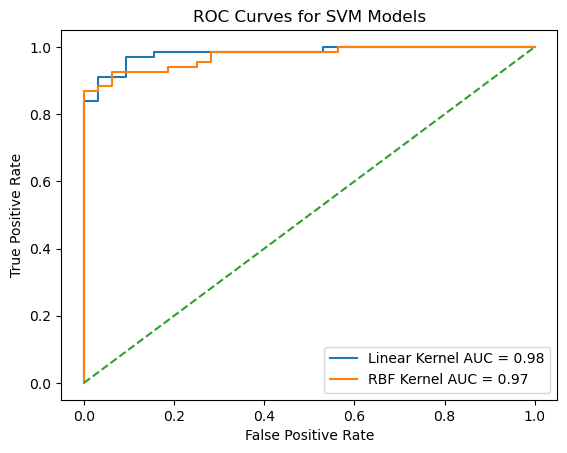

In [21]:
# Import necessary libraries
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(r'C:\Users\gyala\Downloads\student_data.csv')

# Prepare the features (X) and target (y)
X = data[['Hours_Studied', 'Review_Session']]  # Features
y = data['Results']  # Target

# 1. Fit SVM with Linear Kernel
svm_linear = SVC(kernel='linear', probability=True)
svm_linear.fit(X, y)

# Predictions using the linear kernel
y_pred_linear = svm_linear.predict(X)

# Accuracy and AUC for linear kernel
accuracy_linear = accuracy_score(y, y_pred_linear)
print(f'Linear Kernel SVM Accuracy: {accuracy_linear:.2f}')

y_pred_proba_linear = svm_linear.predict_proba(X)[:, 1]
auc_linear = roc_auc_score(y, y_pred_proba_linear)
print(f'Linear Kernel SVM AUC: {auc_linear:.2f}')

# 2. Fit SVM with RBF Kernel using Grid Search for best gamma
# Define the parameter grid for gamma
param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create the RBF kernel SVM model
svm_rbf = SVC(kernel='rbf', probability=True)

# Grid search with cross-validation
grid_search = GridSearchCV(svm_rbf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Best gamma value
best_gamma = grid_search.best_params_['gamma']
print(f'Best Gamma (RBF Kernel): {best_gamma}')

# Fit the SVM with the best gamma
svm_rbf_best = SVC(kernel='rbf', gamma=best_gamma, probability=True)
svm_rbf_best.fit(X, y)

# Predictions using the RBF kernel with the best gamma
y_pred_rbf = svm_rbf_best.predict(X)

# Accuracy and AUC for RBF kernel
accuracy_rbf = accuracy_score(y, y_pred_rbf)
print(f'RBF Kernel SVM Accuracy: {accuracy_rbf:.2f}')

y_pred_proba_rbf = svm_rbf_best.predict_proba(X)[:, 1]
auc_rbf = roc_auc_score(y, y_pred_proba_rbf)
print(f'RBF Kernel SVM AUC: {auc_rbf:.2f}')

# Plot ROC Curves for both models

# Linear Kernel ROC Curve
fpr_linear, tpr_linear, _ = roc_curve(y, y_pred_proba_linear)
plt.plot(fpr_linear, tpr_linear, label=f'Linear Kernel AUC = {auc_linear:.2f}')

# RBF Kernel ROC Curve
fpr_rbf, tpr_rbf, _ = roc_curve(y, y_pred_proba_rbf)
plt.plot(fpr_rbf, tpr_rbf, label=f'RBF Kernel AUC = {auc_rbf:.2f}')

# Plot settings
plt.plot([0, 1], [0, 1], linestyle='--')  # Diagonal line for no-skill classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for SVM Models')
plt.legend()
plt.show()


## ChatGPT script
## https://chatgpt.com/share/67105439-4468-8010-a40d-0fd4aa160dc8